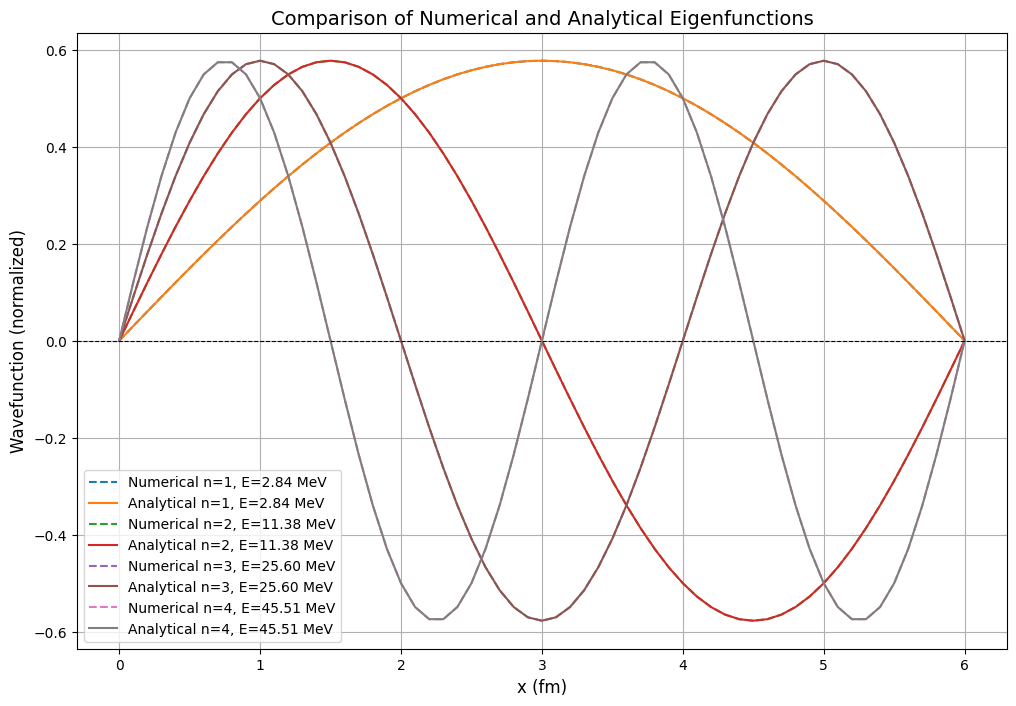

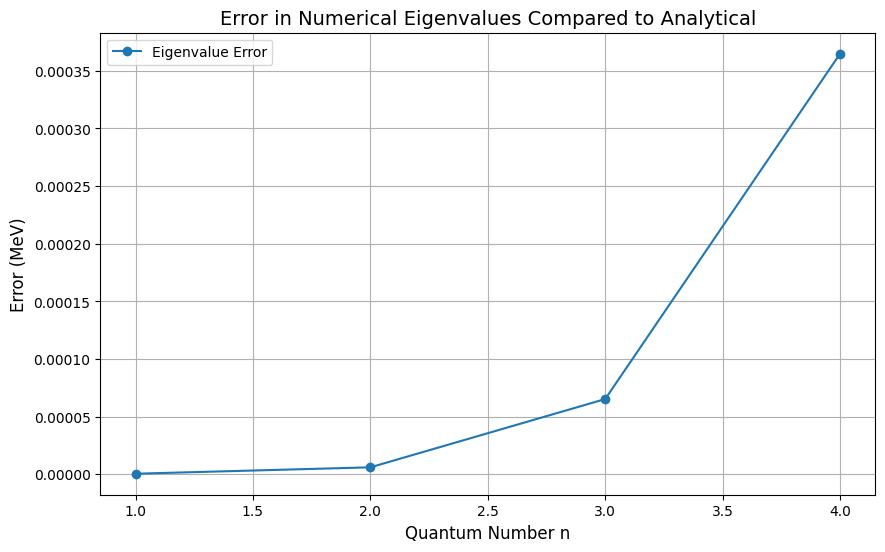

Comparison of Eigenvalues (MeV):
n    Numerical      Analytical     Difference     
1    2.844366       2.844365       0.000001       
2    11.377455      11.377461      0.000006       
3    25.599221      25.599286      0.000065       
4    45.509478      45.509843      0.000365       


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
hbar2_over_2m = 20.75  # MeV·fm²
a = 6.0  # fm (well width)
h = 0.1  # fm (mesh size)
tolerance = 1e-6  # Energy convergence criterion

# Define the potential for the infinite square well
def V(x):
    return 0.0  # Potential inside the well

def numerov(E, x_grid):
    """Numerov method for propagating the wavefunction."""
    N = len(x_grid)
    psi = np.zeros(N)  # Wavefunction array
    # Compute k(x) as an array
    k = 2 * (E - np.array([V(x) for x in x_grid])) / hbar2_over_2m  # k(x) = 2(E - V)/hbar²

    # Initial conditions (ψ(0) = 0, arbitrary ψ(h))
    psi[0] = 0.0
    psi[1] = 1e-5  # Small arbitrary value

    # Numerov method
    for i in range(1, N - 1):
        psi[i + 1] = (
            (2 * (1 - (5 / 12) * h**2 * k[i]) * psi[i]
             - (1 + (1 / 12) * h**2 * k[i - 1]) * psi[i - 1])
            / (1 + (1 / 12) * h**2 * k[i + 1])
        )

    return psi

# Shooting method to find eigenvalues
def shooting_method(n_nodes, x_grid):
    """Find the eigenvalue for a given number of nodes using the shooting method."""
    E_low, E_high = 0.0, 100.0  # Energy range given
    psi = None

    while E_high - E_low > tolerance:
        E_mid = (E_low + E_high) / 2
        psi = numerov(E_mid, x_grid)

        # Count the number of nodes
        nodes = np.sum(psi[:-1] * psi[1:] < 0)

        # Adjust the energy bounds
        if nodes > n_nodes:
            E_high = E_mid
        else:
            E_low = E_mid

    return E_mid, psi

# Analytical solution for the infinite square well
def analytical_solution(n, a, hbar2_over_2m):
    """Calculate the analytical eigenvalue and eigenfunction."""
    E_n = (n**2 * np.pi**2 * hbar2_over_2m) / (2 * a**2)  # Energy
    x_grid = np.arange(0, a + h, h)
    psi_n = np.sqrt(2 / a) * np.sin(n * np.pi * x_grid / a)  # Wavefunction
    return E_n, psi_n

# Set up the spatial grid
x_grid = np.arange(0, a + h, h)

# Numerical solutions
numerical_eigenvalues = []
numerical_wavefunctions = []
for n_nodes in range(4):
    E, psi = shooting_method(n_nodes, x_grid)
    numerical_eigenvalues.append(E)
    # Normalize the wavefunction using the grid spacing
    norm = np.sqrt(np.sum(psi**2) * h)
    numerical_wavefunctions.append(psi / norm)

# Analytical solutions
analytical_eigenvalues = []
analytical_wavefunctions = []
for n in range(1, 5):
    E_n, psi_n = analytical_solution(n, a, hbar2_over_2m)
    analytical_eigenvalues.append(E_n)
    analytical_wavefunctions.append(psi_n)

# Calculate errors for eigenvalues
eigenvalue_errors = [abs(num - ana) for num, ana in zip(numerical_eigenvalues, analytical_eigenvalues)]

# Plot the comparison of wavefunctions
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.plot(x_grid, numerical_wavefunctions[i], '--', label=f'Numerical n={i+1}, E={numerical_eigenvalues[i]:.2f} MeV')
    plt.plot(x_grid, analytical_wavefunctions[i], label=f'Analytical n={i+1}, E={analytical_eigenvalues[i]:.2f} MeV')

plt.title('Comparison of Numerical and Analytical Eigenfunctions', fontsize=14)
plt.xlabel('x (fm)', fontsize=12)
plt.ylabel('Wavefunction (normalized)', fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()
plt.show()

# Plot the error in eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), eigenvalue_errors, 'o-', label='Eigenvalue Error')
plt.title('Error in Numerical Eigenvalues Compared to Analytical', fontsize=14)
plt.xlabel('Quantum Number n', fontsize=12)
plt.ylabel('Error (MeV)', fontsize=12)
plt.grid()
plt.legend()
plt.show()

# Print the comparison of eigenvalues
print("Comparison of Eigenvalues (MeV):")
print(f"{'n':<5}{'Numerical':<15}{'Analytical':<15}{'Difference':<15}")
for n, (num, ana, err) in enumerate(zip(numerical_eigenvalues, analytical_eigenvalues, eigenvalue_errors), start=1):
    print(f"{n:<5}{num:<15.6f}{ana:<15.6f}{err:<15.6f}")
